# Regressão Linear

## Objetivos

Os objetivos deste notebook são:

* introduzir os conceitos básicos iniciais de redes neurais através da 
* otimização de um ajuste de pontos por uma reta (linear) utilizando a 
* técnica de cálculo numérico do gradiente descendente. 

Este notebook contém uma demonstração iterativa do laço de otimização, com visualização: 
* reta de ajuste sendo otimizada
* valores dos parâmetros sendo ajustados
* função de perda sendo minimizada

## Problema de Regressão Linear

O problema de ajuste de uma reta a um conjunto de pontos para verificar se existe uma previsão linear é um problema muito antigo, muito estudado e muito presente nos dias de hoje. 

Quando o ajuste é abordado como um problema de **otimização numérica**, ele é a base de boa parte dos **conceitos sobre redes neurais** e iremos explorá-lo aqui como uma forma de introdução às redes neurais. O modelo de regressão linear que iremos utilizar pode
ser visto como uma rede neural de apenas uma camada e função de ativação linear.

## Conjunto de dados: Flores Íris

Iremos utilizar duas propriedades do conjunto de dados das flores Íris [Wikipedia-Iris_flower_data_set](https://en.wikipedia.org/wiki/Iris_flower_data_set):

* o comprimento das sépalas e 
* o comprimento da pétalas. 

A ideia será prever o comprimento da pétala, conhecendo-se o comprimento da sépala. Estaremos usando apenas uma propriedade, ou característica ou *feature* do objeto para que seja fácil visualizar o espaço de busca de parâmetros. 

Vamos utilizar as 50 amostras da variedade versicolor.

![](../figures/iris_petals_sepals.png)

## Dados: leitura e visualização


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import time

In [2]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_in = data[:,0:1]
y_in = data[:,1:2]
iris_pd = pd.DataFrame(x_in,columns=['x_in'])
iris_pd['y_in'] = y_in
iris_pd.head()

,x_in,y_in
0,7.0,4.7
1,6.4,4.5
2,6.9,4.9
3,5.5,4.0
4,6.5,4.6


## Visualização dos dados `x_in` e `y_in` e normalizados

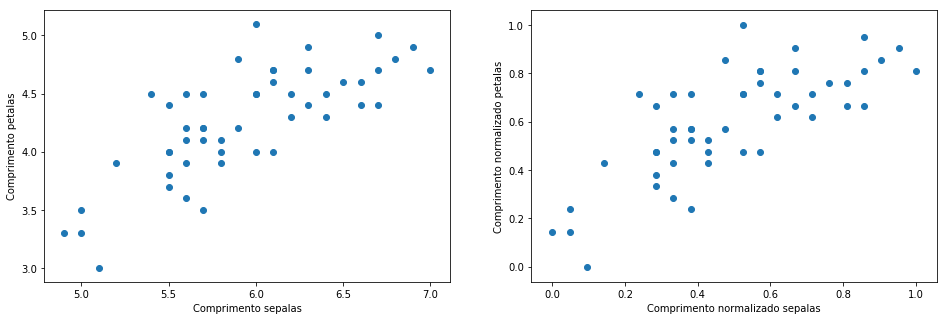

In [3]:
x = x_in - x_in.min()
x /= x.max()    # normalização
y = y_in - y_in.min()
y /= y.max()

fig = plt.figure(figsize=(16,5))
ax_in = fig.add_subplot(1,2,1)
ax_in.scatter(x_in, y_in)
ax_in.set_xlabel('Comprimento sepalas')
ax_in.set_ylabel('Comprimento petalas')
ax_n = fig.add_subplot(1,2,2)
ax_n.scatter(x,y)
ax_n.set_xlabel('Comprimento normalizado sepalas')
ax_n.set_ylabel('Comprimento normalizado petalas');

## Reta de ajuste

A equação da reta no plano necessita de dois parâmetros, aqui denominados $w_0$ (*bias*) e inclinação $w_1$. Veja figura:


<img src="../figures/linhareta.png", width=300pt>

A reta de ajuste será dada por:

$$ \hat{y} = w_0 + w_1 x $$

onde 
* $w_1$ é o coeficiente angular da reta e 
* $w_0$ é a interseção do eixo vertical quando x é igual a zero, também denominado de *bias*.
* $x$ é a variável de entrada (comprimento das sépalas) e 
* $\hat{y}$ é a predição (comprimento estimado das pétalas).

## Representação gráfica da equação linear via neurônio

$ \hat{y} = 1 w_0 + x_0 w_1 $

Temos:
- 1 atributo de entrada: $x_0$
- 2 parâmetros para serem ajustados (treinados) $w_0$ e $w_1$
- 1 classe de saída $\hat{y}$

<img src="../figures/RegressaoLinearNeuronio.png", width=300pt>
$$ \hat{y} = w_0 + w_1 x $$
$$ \mathbf{\hat{y}} = \mathbf{w} \mathbf{x} $$

### Função Custo ou de Perda (MSE - Mean Square Error)

<img src="../figures/Loss_MSE.png",width = 600pt>


A função de custo depende do conjunto de treinamento ($y_i$) e dos valores de predição ($\hat{y_i}$):

$$ J(\hat{y_i},y_i) = \frac{1}{M} \sum_{i=0}^{M-1} (\hat{y_i} - y_i)^2 $$ .


## Laço de minimização via gradiente descendente

O código da próxima célula é a parte principal deste notebook. É aqui que a minimização é feita. É aqui que dizemos que estamos fazendo o *fit*, ou o treinamento do sistema para encontrar o parâmetro $\mathbf{W}$ que minimiza a função de perda $J$. Acompanhamos a convergência da minimização pelo valor da perda a cada iteração, plotando o vetor `J_history`.

O esquema da otimização é representado pelo diagrama a seguir:

<img src="../figures/RegressaoLinear_Otimizacao.png",width = 600pt>

e é implementado pela próxima célula de código:

## Funções: Custo, Gradiente Descendente

In [4]:
def compute_cost(X_b, y, wT):
    '''
    Compute cost for linear regression
    (X,y): amostras rotuladas X(n_samples,2) e y(n_samples,)
    wT: vetor coluna de parâmetros (já transposto)
       aceita tanto shape (2,1) Para um caso como (2,n_history) para n_history casos
    '''
    e = X_b.dot(wT) - y
    J = (e * e).mean(axis=0)
    return J

In [5]:
def batch_gradient_descent(X, y, w_init, lr, n_epochs):
    '''
    Perform batch gradient descent to learn w
    by taking n_epochs gradient steps with learning
    rate lr
    Dados rotulados: X.shape:(M,2) e y.shape:(M,1)
    Parâmetro inicial: w_init.shape:(1,2)
    output: w_history:(num_epochs+1,2)
    '''
    M = y.size
    w_history = np.zeros((2,n_epochs+1))
    wT = w_init.T
    w_history[:,0] = wT[:,0]

    for i in range(n_epochs):
        wT = wT - lr * (2.0 / M) * (X.T).dot(X.dot(wT) - y)
        w_history[:,i+1]=wT[:,0]
    return w_history.T

In [8]:
def minibatch_gradient_descent(X, y, w_init, lr, n_epochs, minibatch_size):
    np.random.seed(42)
    w_history = np.zeros((2, n_epochs + 1), dtype=np.float)
    wT = w_init.T
    w_history[:, 0] = wT[:, 0]

    for i in range(n_epochs):
        idxs = np.arange(X.shape[0])
        np.random.shuffle(idxs)
        for i_start in range(0, X.shape[0], minibatch_size):
            i_end = i_start + minibatch_size
            Xshuff = X[idxs[i_start: i_end], :]
            yshuff = y[idxs[i_start: i_end], :]
            wT = wT - lr * (2. / minibatch_size) * np.dot(Xshuff.T, np.dot(Xshuff, wT) - yshuff)
        w_history[:, i + 1] = wT[:, 0]
    return w_history.T


### Laço de minimização via gradiente descendente - Código

In [9]:
# Parâmetros do gradiente descendente: número de iterações e taxa de aprendizagem
n_samples = y.shape[0] # 50
n_epochs = 40
batch_size = n_samples
lr = 0.5

X_bias = np.hstack([np.ones(shape=(n_samples,1)), x])
w_init = np.zeros(shape=(1,2))
#w_history = batch_gradient_descent(X_bias, y, w_init, lr, n_epochs)
w_history = minibatch_gradient_descent(X_bias, y, w_init, lr, n_epochs, batch_size)
J_history = compute_cost(X_bias, y, w_history.T)

In [10]:
# valor ótimo, solução analítica
w_opt = (np.linalg.inv((X_bias.T).dot(X_bias)).dot(X_bias.T)).dot(y)

## Plotagem iterativa do gradiente descendente, reta ajuste, parâmetros, função perda

<IPython.core.display.Javascript object>


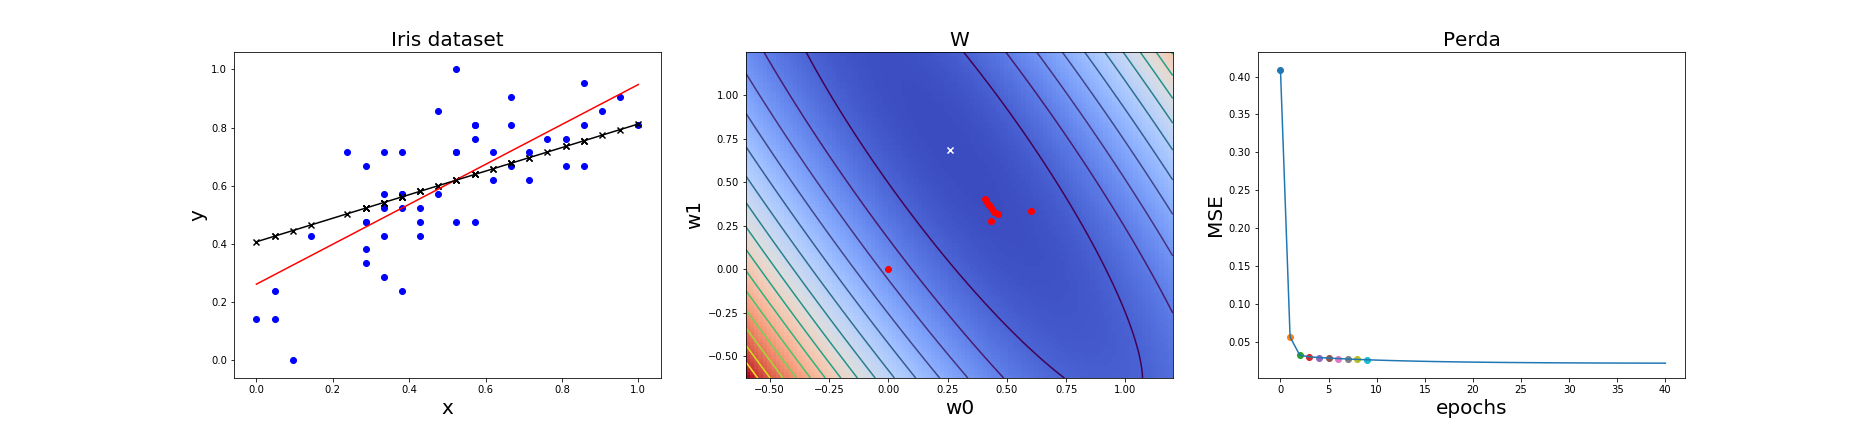

In [40]:
%matplotlib notebook
J_history = compute_cost(X_bias, y, w_history.T)
X_all = np.linspace(x.min(),x.max(),100).reshape(100,1)
X_all_bias = np.hstack([np.ones((100,1)),X_all])
result_opt = X_all_bias.dot(w_opt)  # Predição do valor analítico

# matrib bidimensional de parâmetros
wmin = w_history.min(axis=0)
wmax = w_history.max(axis=0)
D = wmax - wmin
wmin -= D
wmax += D
# Cálculo da matriz bidimensional de parâmetros
ww0, ww1 = np.meshgrid(np.linspace(wmin[0], wmax[0],100), 
                     np.linspace(wmin[1], wmax[1],100))
w_grid = np.c_[ww0.ravel(), ww1.ravel()]
J_grid = compute_cost(X_bias, y, w_grid.T)
J_grid = J_grid.reshape(ww0.shape)
batchs = X_bias.shape[0]/batch_size

fig = plt.figure(figsize=(26,6))
ax_line = fig.add_subplot(1,3,1) # ax1 linha reta
ax_grid = fig.add_subplot(1,3,2)
ax_loss = fig.add_subplot(1,3,3) # ax1 função perda
#ax_loss.plot(np.arange(0,n_epochs+1,batchs),J_history[::batchs])
ax_loss.plot(J_history)
ax_loss.set_title('Perda', fontsize=20)
ax_loss.set_xlabel('epochs', fontsize=20)
ax_loss.set_ylabel('MSE', fontsize=20)
ax_line.scatter(x, y, marker='o', c='b') # plotagem dos pontos azuis no Iris dataset
ax_line.set_title('Iris dataset', fontsize=20)
ax_line.set_xlabel('x', fontsize=20)
ax_line.set_ylabel('y', fontsize=20)
ax_line.plot(X_all, result_opt,c='r') # solução analítica, reta vermelha Iris dataset

ax_grid.pcolormesh(ww0, ww1, J_grid, cmap=plt.cm.coolwarm)
ax_grid.contour(ww0, ww1, J_grid, 20)
ax_grid.scatter(w_opt[0],w_opt[1],marker='x', c='w') # Solução analítica
ax_grid.set_title('W', fontsize=20)
ax_grid.set_xlabel('w0', fontsize=20)
ax_grid.set_ylabel('w1', fontsize=20)

# Plotagem da reta utilizando os parâmetros ótimos encontrados no gradiente descendente
#n_points = 100
n_delta = n_samples//batch_size

for i,w in enumerate(w_history[:10]):#[::n_delta,:]): # i vai 
    y_hat = X_all_bias.dot(w.T)  # Predição via minimização gradiente descendente
    w = w.reshape(1,2)
    J = compute_cost(X_bias, y, w.T)
    ax_loss.scatter(i,J)
    ln, = ax_line.plot(X_all, y_hat, c='k') # reta preta iris dataset
    y_pred = X_bias.dot(w.T)
    sc = ax_line.scatter(x,y_pred,c='k', marker = 'x')
    #for k in range(1):#n_samples):
    #    ax_line.plot([x[k],x[k]],[y_pred[k],y[k]], c='g')
    ax_grid.scatter(w_history[i,0],w_history[i,1],c='r',marker = 'o')
    fig.canvas.draw()
    time.sleep(0.3)
    ln.remove()
    sc.remove()
ax_line.plot(X_all, y_hat, c='k')
ax_line.scatter(x,y_pred,c='k', marker = 'x')


<img src="../figures/RegressaoLinear_Otimizacao.png",width = 600pt>

## Gradiente Descendente Estocástico

<img src="../figures/MinibatchSGD.png",width = 600pt>

<img src="../figures/Loss_MSE_SGD.png",width = 600pt>

## Conclusões desse experimento

Quais são as principais conclusões que podemos tirar deste experimento?

